# Time Series - Clustering Multiple Series example

###### Links: [Walmart dataset (Kaggle)](https://www.kaggle.com/c/m5-forecasting-uncertainty/overview)  |  [Article ()]()

### 0 - Setup

###### Import pckgs 

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ts_utils import *
import datetime

###### Import data

In [2]:
dtf = pd.read_csv('data_multiple.csv')
dtf.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_536_CA_1_validation,FOODS_3_536,FOODS_3,FOODS,CA_1,CA,3,2,2,4,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382_CA_3_validation,FOODS_3_382,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375_WI_1_validation,HOUSEHOLD_1_375,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,1,0,0,1,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084_CA_3_validation,FOODS_2_084,FOODS_2,FOODS,CA_3,CA,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668_CA_1_validation,FOODS_3_668,FOODS_3,FOODS,CA_1,CA,22,9,7,12,...,10,10,8,8,9,10,6,6,10,6


In [3]:
## Randomly reduce number of ts
dtf = dtf.drop_duplicates("item_id", keep='first').head(1000).reset_index(drop=True)
dtf = dtf.drop(["id","dept_id","state_id","store_id"], axis=1)
dtf.head()

,item_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_536,FOODS,3,2,2,4,0,0,2,3,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382,FOODS,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375,HOUSEHOLD,1,0,0,1,0,1,2,3,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084,FOODS,0,0,0,0,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668,FOODS,22,9,7,12,17,20,13,29,...,10,10,8,8,9,10,6,6,10,6


In [4]:
## Create dates list
cols = dtf.filter(like="d_", axis=1).columns.tolist()
dates = pd.date_range(start=(datetime.datetime.now() - datetime.timedelta(days=len(cols)-1)).strftime("%Y-%m-%d"),
                      end=datetime.datetime.now().strftime("%Y-%m-%d"), 
                      freq='D').astype(str).tolist()
print(dates[0:5], "...", dates[-1])

['2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01', '2016-04-02'] ... 2021-06-23


In [5]:
## Rename columns
dtf.columns = ["ts","exog"] + dates
dtf.head()

,ts,exog,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,...,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23
0,FOODS_3_536,FOODS,3,2,2,4,0,0,2,3,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382,FOODS,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375,HOUSEHOLD,1,0,0,1,0,1,2,3,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084,FOODS,0,0,0,0,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668,FOODS,22,9,7,12,17,20,13,29,...,10,10,8,8,9,10,6,6,10,6


### 1 - Analysis

###### Resample

In [6]:
dtf, dates = resample_multiple_ts(dtf, dates, rule="M", agg="mean")
dtf.head()

--- columns from: 1915 --> to: 66 ---


,ts,exog,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_3_536,FOODS,2.333333,1.433333,1.838710,1.433333,1.935484,0.774194,1.233333,1.645161,...,0.633333,1.354839,1.633333,1.161290,1.290323,0.928571,1.322581,1.066667,0.903226,1.565217
1,FOODS_3_382,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.322581,0.600000,0.322581,0.387097,0.357143,1.258065,2.033333,27.967742,0.434783
2,HOUSEHOLD_1_375,HOUSEHOLD,0.333333,1.100000,1.129032,0.733333,0.677419,0.838710,0.966667,0.774194,...,0.200000,0.483871,0.500000,0.709677,0.451613,0.285714,0.741935,0.700000,0.387097,0.695652
3,FOODS_2_084,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.100000,1.806452,1.700000,1.483871,1.709677,0.428571,1.129032,1.133333,1.451613,2.043478
4,FOODS_3_668,FOODS,12.666667,15.900000,16.903226,17.066667,15.225806,12.612903,10.833333,12.612903,...,11.533333,10.838710,9.300000,8.225806,7.516129,9.464286,6.322581,6.233333,6.967742,7.782609


###### Visualization

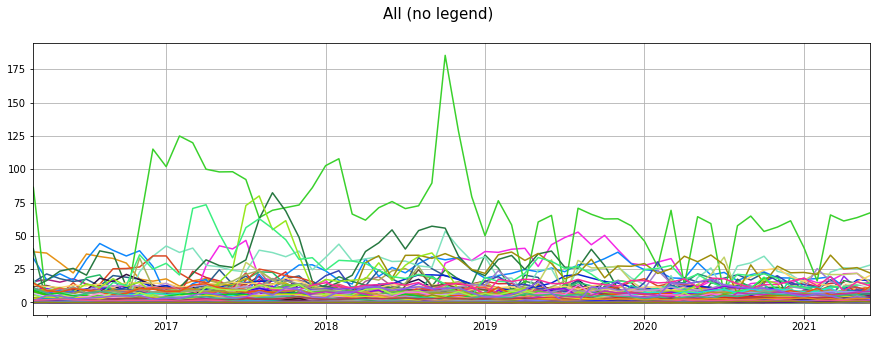

In [7]:
plot_multiple_ts(dtf, dates, color="ts", lst_colors=None, legend=False, title="All (no legend)", figsize=(15,5))

In [8]:
# -> Too many to spot a trend. let's try to color by exog:

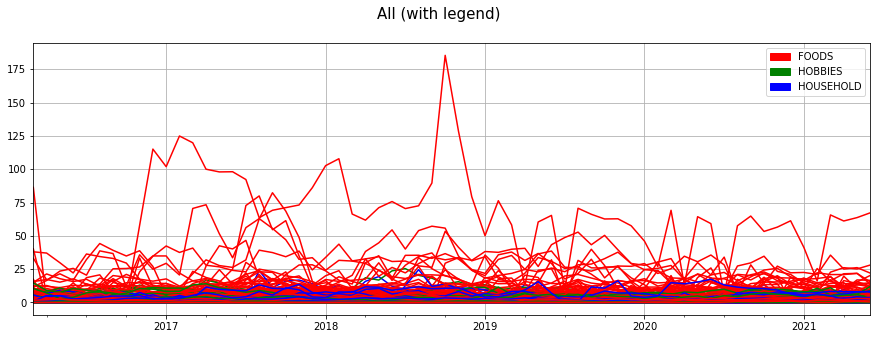

In [9]:
plot_multiple_ts(dtf, dates, color="exog", lst_colors=["red","green","blue"], legend=True, 
                 title="All (with legend)", figsize=(15,5))

In [10]:
# -> Same. Can the series be grouped by exog?

###### Group Series

In [11]:
# Extract means
dtf_sum = summarize_multiple_ts(dtf, by="exog", aggs=["mean"], return_all=False)
dtf_sum

--- rows from: 1000 --> to: 3 ---


,ts,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_mean,1.510593,1.140890,1.096432,1.047599,1.142633,1.232504,1.381568,1.290528,1.597669,...,2.021257,2.028294,1.993856,1.899740,1.721706,1.737439,2.093494,2.079732,2.040459,2.089195
1,HOBBIES_mean,0.692708,0.504902,0.569576,0.565196,0.574004,0.610215,0.575327,0.599937,0.653268,...,0.751634,0.753953,0.724020,0.789374,0.741303,0.756303,0.739247,0.710948,0.663030,0.743627
2,HOUSEHOLD_mean,0.430556,0.436317,0.428515,0.440947,0.435882,0.468041,0.490329,0.472919,0.501132,...,0.843416,0.846476,0.809465,0.844086,0.756870,0.759590,0.830247,0.888889,0.838311,0.886111


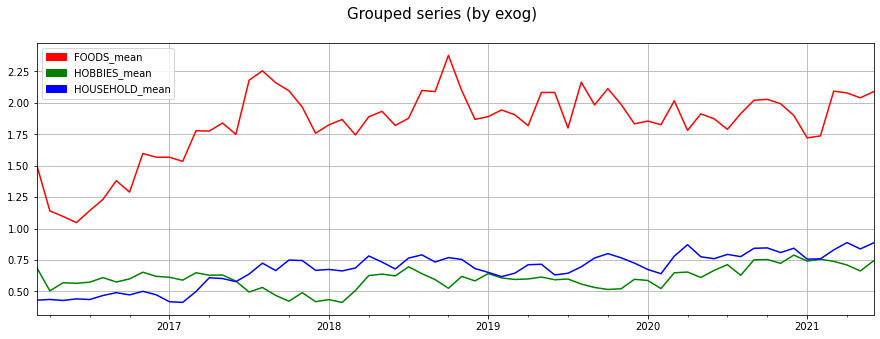

In [12]:
plot_multiple_ts(dtf_sum, dates, color="ts", lst_colors=["red","green","blue"], legend=True, 
                 title="Grouped series (by exog)", figsize=(15,5))

In [13]:
# -> It's more clear now, there is a visual pattern. But can those means be used as proxy for the series?

In [14]:
# Let's compare one mean with all the other series in the group (exog):
dtf_sum = summarize_multiple_ts(dtf[dtf["exog"]=="FOODS"], by=None, aggs=["mean"], return_all=True)
dtf_sum.tail()

--- rows from: 472 --> to: 473 ---


,ts,exog,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
468,FOODS_3_561,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.300000,2.741935,3.066667,2.806452,3.451613,2.428571,2.774194,2.200000,3.032258,2.900000
469,FOODS_3_519,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.666667,0.806452,1.266667,1.096774,1.129032,1.285714,0.258065,0.433333,0.387097,2.100000
470,FOODS_2_221,FOODS,1.625000,2.066667,2.580645,1.900000,1.677419,1.129032,1.100000,1.580645,...,1.400000,1.161290,2.166667,1.516129,0.225806,1.142857,1.387097,1.266667,1.161290,1.100000
471,FOODS_2_310,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.633333,0.709677,0.866667,0.935484,0.483871,0.000000,0.000000,0.533333,0.774194,0.400000
472,mean,NaN,1.510593,1.140890,1.096432,1.047599,1.142633,1.232504,1.381568,1.290528,...,2.021257,2.028294,1.993856,1.899740,1.721706,1.737439,2.093494,2.079732,2.040459,2.089195


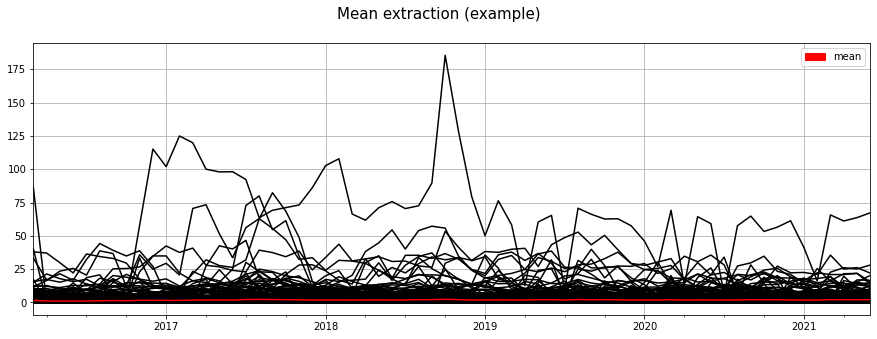

In [15]:
plot_multiple_ts(dtf_sum, dates, legend=True, lst_highlights=["mean"], 
                 title="Mean extraction (example)", figsize=(15,5))

In [16]:
# -> The mean is not representative of the group. So I'll find a new way of grouping the series with Clustering. 

### 2 - Clustering

In [43]:
def utils_cluster_centers(cluster, center):
    scaler = preprocessing.StandardScaler()
    scaler.fit(cluster)
    return scaler.inverse_transform(center)

In [44]:
def clustering_multiple_ts(dtf, idxs, k=None, top=None, figsize=(10,5)):
    ## preprocessing
    dtf_c = dtf.copy()
    scaler = preprocessing.StandardScaler()
    lst_ts = []
    for name in dtf_c["ts"].unique():
        ts = utils_filter_ts(dtf_c, name, idxs)
        ts[ts.columns[0]] = scaler.fit_transform(ts)
        lst_ts.append(ts)

    ## hierarchical clustering
    if k is None:
        print("--- k not defined: using hierarchical clustering ---")
        dtw_sim = utils_dtw_dist(lst_ts, return_sim=False)
        ward_links = sci_cluster.hierarchy.ward(dtw_sim)
        max_dist_allowed_inside_clusters = dtw_sim.mean().mean()*dtw_sim.max().max()/dtw_sim.min().min()
        clusters = sci_cluster.hierarchy.fcluster(ward_links, t=max_dist_allowed_inside_clusters, criterion='distance')
        print("--- found", len(np.unique(clusters)), "clusters ---")
    
    ## k-means
    else:
        print("---", "k="+str(k)+": using k-means ---")
        model = TimeSeriesKMeans(n_clusters=k, metric="dtw")
        clusters = model.fit_predict(to_time_series_dataset(lst_ts))
        
        
        

    ## put in the dtf
    other_cols = dtf_c.drop(idxs, axis=1).columns
    dtf_c["cluster"] = clusters

    ## plot freq
    ax = dtf_c["cluster"].value_counts().head(top).sort_values().plot(kind="barh", title="Cluster distribution", figsize=figsize)
    total = sum([i.get_width() for i in ax.patches])
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.10, 
                str(i.get_width())+" ("+str(round((i.get_width()/total)*100,2))+'%)', 
                fontsize=10, color='black')
    ax.set(xlim=[0, dtf_c["cluster"].value_counts().max()+dtf_c["cluster"].value_counts().mean()])
    ax.grid(axis="x")
    plt.show()
    return dtf_c[list(other_cols)+["cluster"]+idxs]

###### Find Clusters

--- k not defined: using hierarchical clustering ---
--- found 1 clusters ---


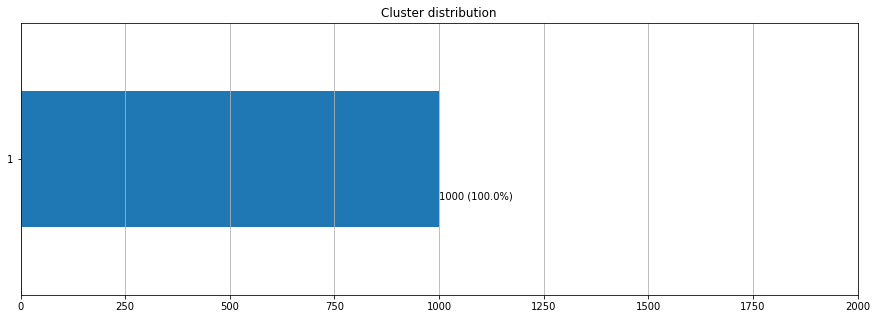

In [45]:
dtf_c = clustering_multiple_ts(dtf, dates, k=None, top=10, figsize=(15,5))

--- k=10: using k-means ---


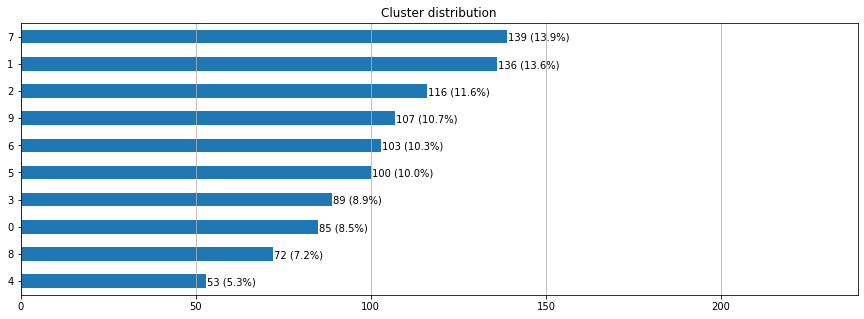

In [20]:
# Find clusters
dtf_c = clustering_multiple_ts(dtf, dates, k=10, figsize=(15,5))

In [21]:
dtf_c.head()

,ts,exog,cluster,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_3_536,FOODS,0,1.500,1.733333,1.516129,1.733333,1.677419,0.645161,1.633333,...,0.833333,1.677419,1.366667,1.290323,1.096774,1.071429,1.322581,0.700000,1.387097,1.3
1,FOODS_3_382,FOODS,4,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,1.161290,0.500000,0.064516,0.419355,0.750000,1.838710,19.733333,10.129032,0.2
2,HOUSEHOLD_1_375,HOUSEHOLD,6,1.125,1.166667,0.806452,0.700000,0.806452,0.903226,0.900000,...,0.266667,0.516129,0.700000,0.483871,0.451613,0.535714,0.580645,0.666667,0.451613,0.8
3,FOODS_2_084,FOODS,7,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.933333,1.935484,1.733333,1.129032,1.419355,0.535714,1.193548,1.300000,1.709677,2.1
4,FOODS_3_668,FOODS,6,15.625,17.233333,15.225806,17.700000,13.838710,10.516129,12.466667,...,11.800000,10.096774,8.366667,8.419355,8.000000,8.178571,6.677419,5.633333,7.580645,8.3


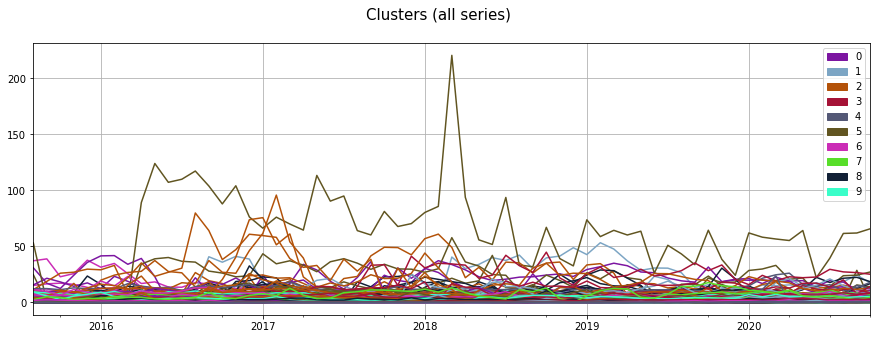

In [20]:
# Plot all clusters
plot_multiple_ts(dtf_c, dates, color="cluster", lst_colors=None, legend=True, 
                 title="Clusters (all series)", figsize=(15,5))

###### Check single cluster

In [21]:
c = 1

In [22]:
dtf_sum = summarize_multiple_ts(dtf_c[dtf_c["cluster"]==c], by=None, aggs=["mean"], return_all=True)
dtf_sum.tail()

--- rows from: 136 --> to: 137 ---


,ts,exog,cluster,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
132,FOODS_2_193,FOODS,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.161290,0.206897,0.161290,0.200000,0.193548,0.100000,0.354839,0.290323,0.466667,0.233333
133,FOODS_3_489,FOODS,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.451613,4.655172,3.451613,3.500000,3.290323,4.366667,2.612903,2.806452,2.166667,2.200000
134,HOUSEHOLD_1_264,HOUSEHOLD,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.193548,0.310345,0.064516,0.233333,0.258065,0.200000,0.354839,0.193548,0.333333,0.433333
135,FOODS_3_519,FOODS,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.322581,0.586207,0.870968,1.300000,1.129032,1.800000,0.516129,0.193548,0.600000,0.733333
136,mean,NaN,1.0,0.058541,0.04902,0.036765,0.018137,0.021822,0.032495,0.059584,...,1.162713,1.210193,1.260911,1.299510,1.177894,1.170833,1.105550,1.079696,1.091667,1.074020


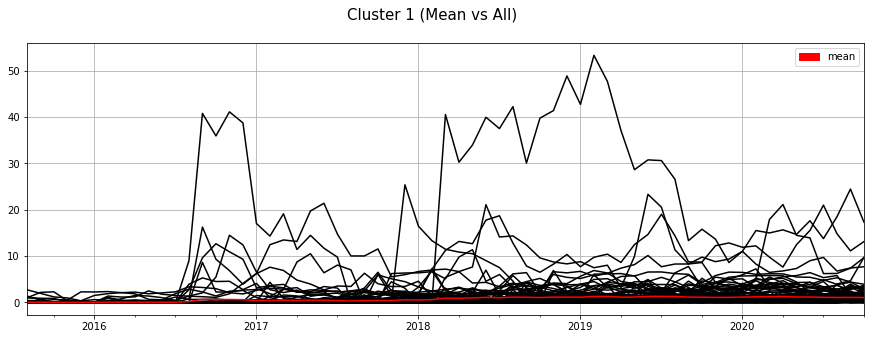

In [23]:
plot_multiple_ts(dtf_sum, dates, legend=True, lst_highlights=["mean"], 
                 title="Cluster "+str(c)+" (Mean vs All)", figsize=(15,5))

###### Group Series

In [24]:
# Sum each cluster
dtf_sum = summarize_multiple_ts(dtf_c, by="cluster", aggs=["mean"], return_all=False)
dtf_sum

--- rows from: 1000 --> to: 10 ---


,ts,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,0_mean,2.325444,2.171154,1.866625,1.946154,2.269851,2.440447,2.675729,2.196030,2.246795,...,1.874690,1.870690,1.910670,1.756410,1.602978,1.344872,1.493176,1.574442,1.209615,1.237179
1,1_mean,0.058541,0.049020,0.036765,0.018137,0.021822,0.032495,0.059584,0.054080,0.057108,...,1.162713,1.210193,1.260911,1.299510,1.177894,1.170833,1.105550,1.079696,1.091667,1.074020
2,2_mean,1.021015,1.234364,1.526771,1.586598,1.565680,1.923844,2.191966,2.024942,2.315464,...,1.463918,1.523285,1.617559,1.510997,1.313934,1.187285,1.257067,1.431659,1.323368,1.263230
3,3_mean,0.108100,0.099242,0.076002,0.065909,0.095064,0.088954,0.134796,0.166911,0.186111,...,1.638319,1.671630,1.658113,1.730556,1.816960,1.828535,1.908113,2.000244,1.890404,1.913636
4,4_mean,0.252465,0.228846,0.246898,0.247222,0.228495,0.220223,0.239390,0.265715,0.245726,...,1.079611,1.246684,1.352151,1.265171,1.149090,1.098932,1.180935,1.272953,1.379060,1.458974
5,5_mean,1.000000,0.305932,0.401586,0.458192,0.595407,0.706944,0.825541,0.962274,2.171469,...,2.157463,1.925774,1.905686,1.846893,1.853198,1.330226,1.533078,2.016676,2.289266,2.261017
6,6_mean,3.387430,3.055285,2.743116,2.554472,2.732101,2.680173,2.772498,2.503934,2.419512,...,1.071204,1.013457,0.973643,1.021138,0.967349,0.952846,1.096774,1.169158,1.023171,1.111789
7,7_mean,0.951122,1.102083,1.176747,1.097222,1.173387,1.041667,1.237069,1.179435,1.160417,...,1.376344,1.405891,1.286962,1.563889,1.469758,1.479167,1.616935,1.395161,1.001389,1.120833
8,8_mean,0.586824,0.542574,0.643245,0.617162,0.954008,0.873842,0.835439,0.896519,0.851815,...,1.067391,0.963127,0.864580,0.892739,0.805813,0.893399,0.836474,0.970616,1.048185,1.013531
9,9_mean,1.501479,1.194444,1.020678,0.835470,0.850289,0.787014,0.730769,0.720017,0.771795,...,0.791977,0.782051,0.794045,0.757692,0.711745,0.726496,0.823821,0.905294,1.004701,1.010684


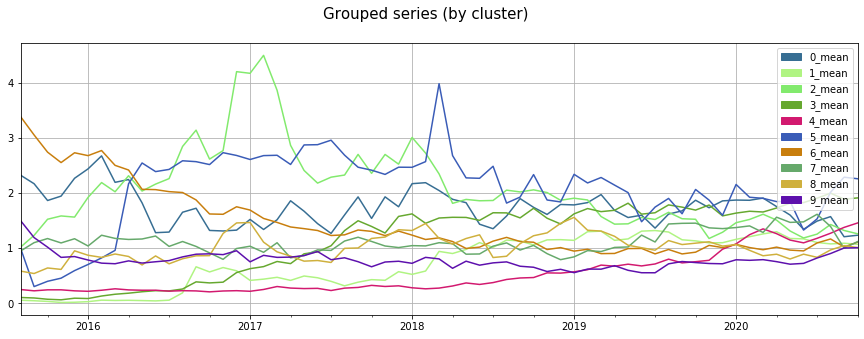

In [25]:
# Plot clusters
plot_multiple_ts(dtf_sum, dates, color="ts", lst_colors=None, legend=True, 
                 title="Grouped series (by cluster)", figsize=(15,5))

In [26]:
# -> I will work with the means series.

### 3 - Preprocessing

###### Partitioning

In [27]:
# By Rows
dtf_train, dtf_test = split_multiple_train_test(dtf_c, idxs=None, test_size=0.2, idx_split=None)
print("train:", dtf_train.shape, "| test:", dtf_test.shape)

train: (800, 66) | test: (200, 66)


In [28]:
dtf_test.head()

,ts,exog,cluster,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
814,HOUSEHOLD_2_327,HOUSEHOLD,5,0.038462,0.033333,0.000000,0.033333,0.064516,0.064516,0.172414,...,0.193548,0.206897,0.290323,0.433333,0.580645,0.600000,0.483871,0.483871,0.200000,0.433333
345,HOUSEHOLD_1_513,HOUSEHOLD,8,0.000000,0.200000,0.612903,0.233333,0.548387,0.354839,0.137931,...,0.064516,1.137931,1.225806,0.066667,0.000000,0.000000,0.032258,0.677419,0.500000,0.533333
824,FOODS_2_189,FOODS,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.580645,3.600000,3.354839,4.266667,3.806452,3.354839,3.133333,4.233333
964,FOODS_3_489,FOODS,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.451613,4.655172,3.451613,3.500000,3.290323,4.366667,2.612903,2.806452,2.166667,2.200000
566,FOODS_1_012,FOODS,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.689655,...,10.354839,10.310345,8.419355,8.900000,7.354839,7.766667,7.677419,7.709677,3.766667,1.200000


In [29]:
# By Columns
dtf_train, dtf_test = split_multiple_train_test(dtf_c, idxs=dates, test_size=0.2, idx_split=None)
print("train:", dtf_train.shape, "| test:", dtf_test.shape)

--- splliting at 2019-10-31 (0.79) ---
train: (1000, 53) | test: (1000, 16)


In [30]:
dtf_test.head()

,ts,exog,cluster,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,FOODS_3_536,FOODS,0,1.161290,1.066667,1.032258,0.709677,1.172414,1.709677,1.200000,1.290323,0.933333,1.322581,1.000000,0.900000,1.466667
1,FOODS_3_382,FOODS,5,1.903226,2.700000,2.258065,2.161290,1.413793,1.000000,0.333333,0.064516,0.500000,0.903226,2.064516,28.666667,1.000000
2,HOUSEHOLD_1_375,HOUSEHOLD,6,0.935484,0.533333,0.387097,0.290323,0.413793,0.516129,0.700000,0.516129,0.266667,0.806452,0.580645,0.500000,0.566667
3,FOODS_2_084,FOODS,4,1.806452,2.366667,2.645161,2.258065,2.034483,1.645161,1.800000,1.322581,0.933333,0.935484,1.129032,1.400000,1.933333
4,FOODS_3_668,FOODS,6,8.451613,9.200000,10.322581,10.774194,11.620690,9.806452,7.700000,8.419355,9.433333,6.419355,6.193548,6.466667,7.900000


### 4 - Forecasting